# Pytorch를 사용한 선형 SVM 모델 학습 및 결정 경계 시각화 실습

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

### 데이터 생성

In [2]:
x = torch.randn(100, 2)
y = torch.where(x[:,0] > x[:,1] , 1, -1).float()

dataset = TensorDataset(x, y)
loader = DataLoader(dataset, batch_size=36)

### SVM 모델 정의

In [3]:
class SVM(nn.Module) : 
    def __init__(self) : 
        super().__init__()
        self.linear = nn.Linear(2,1)
        
    def forward(self, x) : 
        return self.linear(x)

### 모델 , 손실 함수, 옵티마이저 생성

In [4]:
model = SVM()
criterion = nn.HingeEmbeddingLoss() # 양성 1 음성 -1 클래스로 지정되어 있어야 사용가능 
# (주어진 입력과 대상 사이의 경계선 손실값 계산 하는 함수) -> 이진 분류 문제에서 사용 
optimizer = optim.SGD(model.parameters(), lr=0.001)

### 모델 학습 loop

In [5]:
for epoch in range(1000) : 
    for inputs, targets in loader : 
        output = model(inputs)
        loss = criterion(output.squeeze() , targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 10 == 0 : 
        print(f"Epoch [{epoch + 1} / 50] , Loss : {loss.item():4f}")

Epoch [10 / 50] , Loss : 0.810490
Epoch [20 / 50] , Loss : 0.785919
Epoch [30 / 50] , Loss : 0.761349
Epoch [40 / 50] , Loss : 0.736779
Epoch [50 / 50] , Loss : 0.712209
Epoch [60 / 50] , Loss : 0.687638
Epoch [70 / 50] , Loss : 0.663068
Epoch [80 / 50] , Loss : 0.638498
Epoch [90 / 50] , Loss : 0.613928
Epoch [100 / 50] , Loss : 0.589465
Epoch [110 / 50] , Loss : 0.565165
Epoch [120 / 50] , Loss : 0.540864
Epoch [130 / 50] , Loss : 0.516563
Epoch [140 / 50] , Loss : 0.492624
Epoch [150 / 50] , Loss : 0.468726
Epoch [160 / 50] , Loss : 0.445143
Epoch [170 / 50] , Loss : 0.422278
Epoch [180 / 50] , Loss : 0.399412
Epoch [190 / 50] , Loss : 0.377494
Epoch [200 / 50] , Loss : 0.355866
Epoch [210 / 50] , Loss : 0.334849
Epoch [220 / 50] , Loss : 0.314420
Epoch [230 / 50] , Loss : 0.294362
Epoch [240 / 50] , Loss : 0.274304
Epoch [250 / 50] , Loss : 0.254247
Epoch [260 / 50] , Loss : 0.234189
Epoch [270 / 50] , Loss : 0.214131
Epoch [280 / 50] , Loss : 0.194407
Epoch [290 / 50] , Loss : 0.1

### 시각화

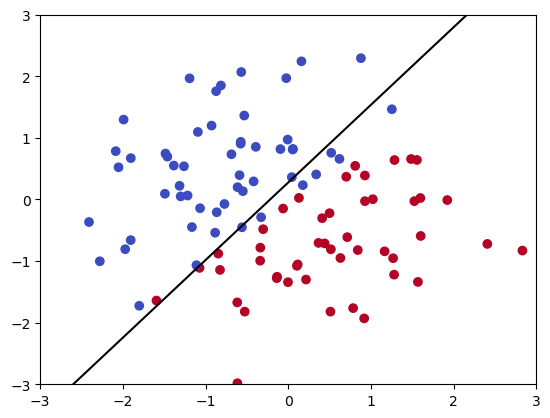

In [6]:
# 결정 경계 시각화
import matplotlib.pyplot as plt
import numpy as np

w = list(model.parameters())[0][0]
b = list(model.parameters())[1].item()
slope = (-w[0] / w[1]).detach().numpy()
intercept = (-b / w[1]).detach().numpy()
x_range = np.linspace(-3, 3, 100)
y_range = slope * x_range + intercept

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.plot(x_range, y_range, 'k-')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()